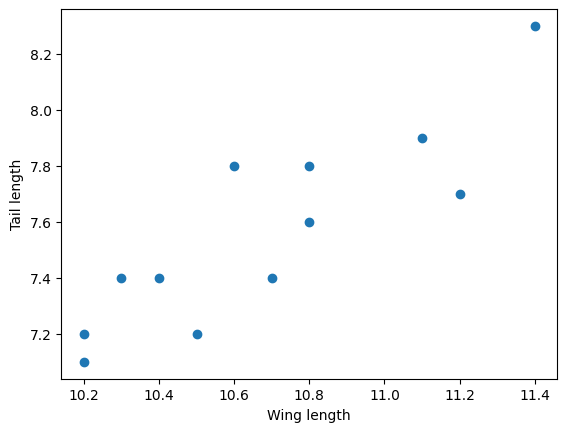

In [ ]:
# --------------
# Exercise 1
# --------------

import matplotlib.pyplot as plt

X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3] 

plt.plot(X, Y, 'o')
plt.xlabel("Wing length")
plt.ylabel("Tail length")
plt.show()

Yes the values of wing length and tail length seem positively correlated

In [4]:
# --------------
# Exercise 2
# --------------

import numpy as np

# Data
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Step 1: Compute means
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Step 2: Compute deviations from mean
dx = X - mean_x
dy = Y - mean_y

# Step 3: Compute numerator (covariance sum)
numerator = np.sum(dx * dy)

# Step 4: Compute denominator (sqrt of sum of squares)
denominator = np.sqrt(np.sum(dx**2) * np.sum(dy**2))

# Step 5: Pearson correlation
r_manual = numerator / denominator

print("manual Pearson's r:", r_manual)

# using built-it 
r_python = np.corrcoef(X, Y)[0, 1]

print("corrcoef Pearson's r:", r_python)

manual Pearson's r: 0.8703545613058226
corrcoef Pearson's r: 0.8703545613058227


In [8]:
# --------------
# Exercise 3
# --------------

import numpy as np

r = r_python  # <-- your computed Pearson r
n = 12

# Standard error of r
numerator = (1 - r**2)
denominator = (n - 2)
Sr = np.sqrt(numerator / denominator)

print("standard error of Pearson's correlation", Sr)

# 1. Fisher's z transformation of r
z = 0.5 * (np.log((1 + r) / (1 - r)))

# 2. Compute its standard deviation 
Sz = np.sqrt(1 / (n - 3))

# 3. Compute confidence intervals in this z space (95% CI)
z_plus = z + 1.96 * Sz
z_minus = z - 1.96 * Sz

# 4. Translate z values back to r
r_upper = (np.exp(2 * z_plus) - 1) / (np.exp(2 * z_plus) + 1)
r_lower = (np.exp(2 * z_minus) - 1) / (np.exp(2 * z_minus) + 1)

print("Confidence interval:", r_lower, r_upper)


standard error of Pearson's correlation 0.15571863652567375
Confidence interval: 0.5923032846726551 0.9631607285142775


In [ ]:
# --------------
# Exercise 4
# --------------

import numpy as np
from scipy import stats

t = np.sum(r/Sr)
df = n - 2
alpha = 0.05
n = 12

p_value = 2 * stats.t.sf(np.abs(t), df)   

if p_value < alpha:
    print(f"Reject H0: r ≠ 0. p = {p_value:.4f}, t = {t:.3f}")
else:
    print(f"Fail to reject H0 (not significant). p = {p_value:.4f}, t = {t:.3f}")


Reject H0: r ≠ 0. p = 0.0002, t = 5.589, df = 10


In [ ]:
# --------------
# Exercise 5
# --------------

import numpy as np
from scipy import stats

rs = 0.75
df = n - 2
alpha = 0.05
n = 12

# Fisher's z transformation of rs
z_rs = 0.5 * (np.log((1 + rs) / (1 - rs)))

# Compute test statistic
numerator = np.sum(z - z_rs)
denominator = np.sqrt(1/(n - 3))
t_lambda = np.sum(numerator/denominator)

p_value = 2 * stats.t.sf(np.abs(t_lambda), df)   

if p_value < alpha:
    print(f"Reject H0: r ≠ 0. p = {p_value:.4f}, t = {t_lambda:.3f}")
else:
    print(f"Fail to reject H0 (not significant). p = {p_value:.4f}, t = {t_lambda:.3f}")

Fail to reject H0 (not significant). p = 0.3035, t = 1.085, df = 10


In [ ]:
# --------------
# Exercise 6
# --------------

import numpy as np
from statsmodels.stats.power import NormalIndPower

# Parameters
alpha = 0.05   # significance level
power_target = 0.80   # desired power (80%)
effect_size_r = 0.5   # correlation threshold

effect_size_z = np.arctanh(effect_size_r)  # Fisher's z

# Compute required sample size
analysis = NormalIndPower()
n_required = analysis.solve_power(effect_size=effect_size_z,
                                  power=power_target,
                                  alpha=alpha,
                                  alternative='two-sided')

print(f"Required sample size to detect r ≥ {effect_size_r}: {np.ceil(n_required)}")

# Compute actual power for a given n (say n=12 from your data)
n_actual = 12
power_actual = analysis.power(effect_size=effect_size_z,
                              nobs=n_actual,
                              alpha=alpha,
                              alternative='two-sided')

print(f"Statistical power with n={n_actual}: {power_actual:.3f}")
